## Lecture 3: Predictive Models and the Bias-Variance trade-off 

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from numpy import random
rng = random.default_rng(123)

### Fuel Consumption Data Set 
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon 
- `cyl` is Number of cylinders, 
- `disp` is	Displacement (cu.in.), 
- `hp` is	Gross horsepower, 
- `drat` is	Rear axle ratio, 
- `wt` is the Weight (1000 lbs), 
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight), 
- `am` is Transmission (0 = automatic, 1 = manual), 
- `gear` is the Number of forward gears, 
- `carb` is	Number of carburetors.

In [41]:
import pandas as pd
#load mtcars
dfcars = pd.read_csv("../data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [42]:
dfcars.shape

(32, 12)

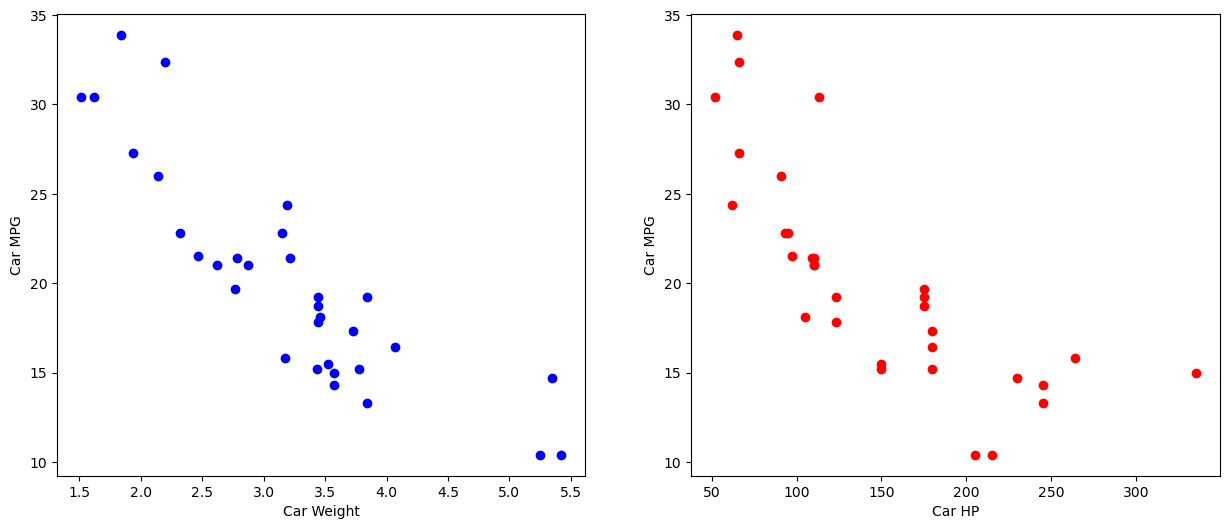

In [43]:
y_mpg = np.array(dfcars.mpg)
x_wt = np.array(dfcars.wt)
x_hp = np.array(dfcars.hp)
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(x_wt, y_mpg,'bo')
ax[0].set_xlabel('Car Weight')
ax[0].set_ylabel('Car MPG')
ax[1].plot(x_hp, y_mpg,'ro')
ax[1].set_xlabel('Car HP')
ax[1].set_ylabel('Car MPG')
plt.show()

* Next, let's split the dataset into a training set and test set.
* There are two critical parameters here.  
    * `test_size` determines what fraction of the data should be set aside for the test set
    * `random_state` sets a seed in order to first shuffle the data and then split it. 
    * 
* this is cool.  I can directly split the data frame, and thus be able to have two separate data frames. 

In [44]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time

traindf, testdf = train_test_split(dfcars, test_size=0.3, random_state=83)


In [45]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 9 to 18
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  22 non-null     object 
 1   mpg         22 non-null     float64
 2   cyl         22 non-null     int64  
 3   disp        22 non-null     float64
 4   hp          22 non-null     int64  
 5   drat        22 non-null     float64
 6   wt          22 non-null     float64
 7   qsec        22 non-null     float64
 8   vs          22 non-null     int64  
 9   am          22 non-null     int64  
 10  gear        22 non-null     int64  
 11  carb        22 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 2.2+ KB


Our **target** variable - `y` is mpg.   hp and wt are **predictors** - the `x` variable 

In [46]:
#Here is how to extract the numpy arrays from the training data frame.
mpg_train = np.array(traindf.mpg)
hp_train = np.array(traindf.hp)
wt_train = np.array(traindf.wt)
#do the stupid reshape to make regression function work. 
hp_train = hp_train.reshape(hp_train.shape[0], 1)
wt_train = wt_train.reshape(wt_train.shape[0], 1)

In [ ]:
#here is how to extract the numpy arrays from the test data frame.
mpg_test = np.array(testdf.mpg)
hp_test = np.array(testdf.hp)
wt_test = np.array(testdf.wt)
#do the stupid reshape to make regression function work. 
hp_test = hp_test.reshape(hp_test.shape[0], 1)
wt_test = wt_test.reshape(wt_test.shape[0], 1)

In [48]:
from sklearn.linear_model import LinearRegression
#create linear model
lr_hp = LinearRegression()
#fit linear model for hp
lr_hp.fit(hp_train, mpg_train)
#predict the test data from hp
hp_pr_mpg = lr_hp.predict(hp_test)

### Model Evaluation using $R^2$ - proportion of variance accounted for by the model. 

* The predicted values of $y$ are $\hat{y}_i$ from each $x_i$ 

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i, 

$$

* Then the equation for $R^2$ is 

$$ R^2
= 1 - \frac{\mathrm{SS}_{\mathrm{res}}}{\mathrm{SS}_{\mathrm{tot}}}
= 1 - \frac{\sum_{i=1}^{n} \bigl(y_i - \hat{y}_i\bigr)^2}{\sum_{i=1}^{n} \bigl(y_i - \bar{y}\bigr)^2},
$$

* Notice that the numerator is our error function that we minimized to get our least squares solution.  
* The denominator is the variance in the $y$ (without dividing by the number of samples) 


$$
\mathrm{SS}_{\mathrm{res}}
= \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i \bigr)^2
= \sum_{i=1}^{n} \bigl(y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)\bigr)^2,
$$

$$
\mathrm{SS}_{\mathrm{tot}}
= \sum_{i=1}^{n} \bigl(y_i - \bar{y} \bigr)^2,

$$

* $\bar{y}$ is just the mean.  

$$\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i $$

* Equivalently, a common form in the case of simple linear regression is 

$$
R^2
= \frac{\mathrm{Cov}(X,Y)^2}{\mathrm{Var}(X)\,\mathrm{Var}(Y)}
= \rho_{XY}^2,
$$

* where $\rho_{XY}$ is the correlation coefficient


In [49]:
hp_test_r2 = lr_hp.score(hp_test, mpg_test)
hp_train_r2 = lr_hp.score(hp_train, mpg_train)
print('hp training R^2 = ' ,hp_train_r2)
print('hp test R^2 = ' ,hp_test_r2)

hp training R^2 =  0.605653885592825
hp test R^2 =  0.5786483221508159


In [50]:
lr_mpg = LinearRegression()  #create linear model
lr_mpg.fit(wt_train, mpg_train) #fit linear model for wt
wt_pr_mpg = lr_mpg.predict(wt_test) #predict mpg from wt for test data
wt_train_r2 = lr_mpg.score(wt_train, mpg_train) #compute R^2 for training data
wt_test_r2 = lr_mpg.score(wt_test, mpg_test) #compute R^2 for test data
print('wt training R^2 =' ,wt_train_r2) 
print('wt test R^2 =' ,wt_test_r2)

wt training R^2 = 0.7984919418023596
wt test R^2 = 0.5670679031203465


### Some preliminary thoughts:  
* Wt seems fit the mpg much better than horse power. 
    * $R^2$ in the training data is 0.80 for weight, $R^2$ in the training data is only 0.61 for hp   
* Both models predict new variables with about the same accuracy
    * $R^2$ in the test data is 0.57 for weight, $R^2$ in the test data is only 0.58 for hp 
* Paradoxically, fitting the data better may not result in a better predictive model. 

### K nearest neighbors (K-nn) regression

Linear Regression is not the only way to do regression.  
**K-nn regression**  is based on a simple idea:

* For every data point ${x,y}$ find the K nearest neighbors in the training set and estimate as: 

$$ \hat{y} = \frac{1}{K}\sum_{k=1}^{K} y_k $$


In [56]:
# Here is how we make a model with K = 5
from sklearn.neighbors import KNeighborsRegressor #import the KNN regression model
knn = KNeighborsRegressor(n_neighbors=6) # Create KNN model with K hyperparameter
knn.fit(wt_train, mpg_train) # Fit the model to training data
knn_train= knn.predict(wt_train) # Predict on training data
knn_test = knn.predict(wt_test) # Predict on test data
train_r2 = knn.score(wt_train, mpg_train) # R^2 for training data
test_r2 = knn.score(wt_test, mpg_test) # R^2 for test data
print('Knn5 hp training R^2 = ' ,train_r2) 
print('Knn5 hp test R^2 = ' ,test_r2)

Knn5 hp training R^2 =  0.8567780021942949
Knn5 hp test R^2 =  0.6077514879618441


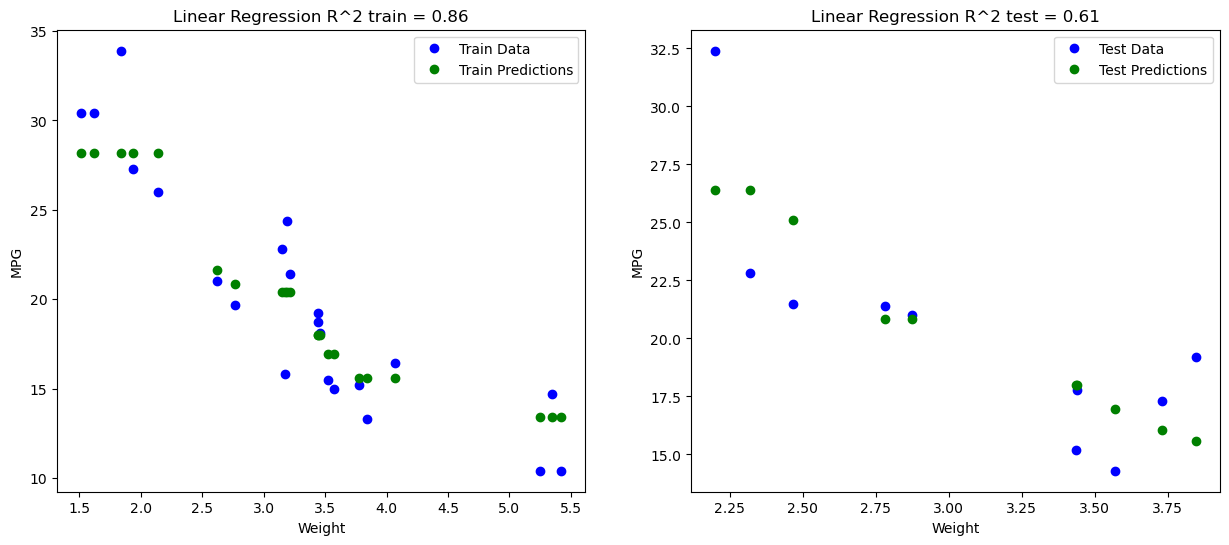

In [57]:

fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(wt_train, mpg_train,'bo',label ='Train Data')
ax[0].plot(wt_train, knn_train,'go',label ='Train Predictions')
ax[0].set_xlabel('Weight')
ax[0].set_ylabel('MPG')
ax[0].set_title('Linear Regression R^2 train = %.2f'%(train_r2))
ax[0].legend()
ax[1].plot(wt_test, mpg_test,'bo',label ='Test Data')
ax[1].plot(wt_test, knn_test,'go',label ='Test Predictions')
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('MPG')
ax[1].set_title('Linear Regression R^2 test = %.2f'%(test_r2))
ax[1].legend()
plt.show()

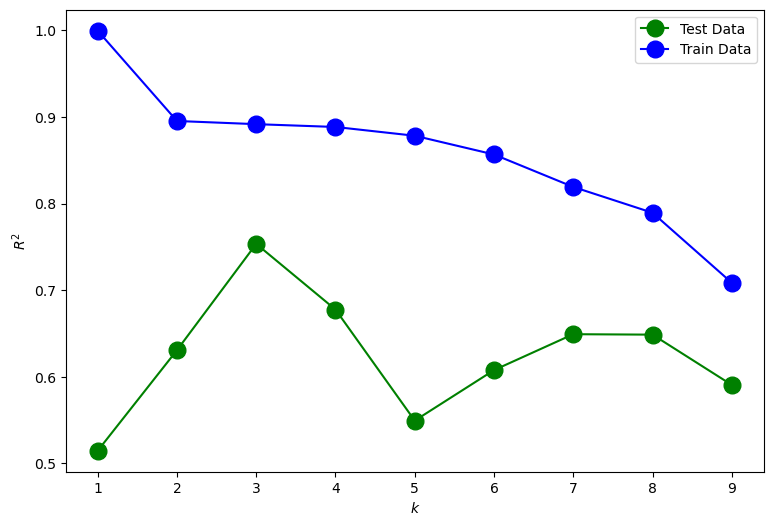

In [59]:
ks = range(1, 10) # Grid of k's
scores_test = [] # R2 scores for TEST DATA
scores_train = [] # R2 scores FOR TRAINING DATA
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model for each value of k
    knnreg.fit(wt_train, mpg_train) # Fit the model to training data
    score_test = knnreg.score(wt_test, mpg_test) # Calculate R^2 score for test data
    scores_test.append(score_test)  
    score_train = knnreg.score(wt_train, mpg_train) # Calculate R^2 score for training data
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(ks, scores_test,'go-', ms=12, label='Test Data')
ax.plot(ks, scores_train,'bo-', ms=12, label='Train Data')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.legend()
plt.show()

### Bias-Variance Tradeoff 

* Suppose we have some data $D = {(x_i,y_i) \space \space i=1,2,\dots n}$
* There is some true, but unknown relationship between x and y such that 
$$ y = f(X) + \epsilon $$
* $\epsilon$ is the error inherent in the measurement process, and is termed **irreducible**.
* We can use various statistical learning methods like regression models, classification models, or even neural networks, to approximate $f(x)$ with $\hat{f}(x)$
* $\hat{f}(x)$ depends on two things.  
    * the specific form and details of our choice of model (e.g., linear model versus polynomial, or in the case of k-nn the number of neighbors)
    * the training data used to fit the model parameters.

Formally, we can model the expected error in predicting $y$ from $\hat{f}(x)$ as 

$$E[(y -\hat{f}(x))^2] = (Bias[\hat{f}(x)])^2 + Var[\hat{f}(x)] + Var[\epsilon] $$

* Here E is the expected value.  In other words, if we repeated the measurement of data sets D and modeling process many times and average the expected error would be composed of 3 parts.  





### Intuitions 


* The important thing here is $E[\hat{f}(x)]$ is the expected value of the prediction over many repetitions.  

* Bias at x is just the error inherent in approximating $f(x)$ with the form we have chosen with $\hat{f}(x)$

    $$ Bias[\hat{f}{x}] = E[\hat{f}(x)] - f(x) $$

* Bias measures how far the average model (over many training sets) is from the true function $f(x)$

    * High bias → **underfitting** (model too simple, e.g., linear fit to a highly non-linear function).

* Variance reflects how variable the predictions of the model are over different training sets:


    $$ Var[\hat{f}(x)]  = E[(\hat{f}(x) - E[\hat{f}(x)])^2] $$

* Variance measures how much the model’s predictions fluctuate if we change the training data.

    * High variance → **overfitting** (model too complex, sensitive to noise in training data).

### The Trade-Off

* As we increase model complexity (e.g., more parameters, deeper networks, higher-degree polynomials):

    * Bias usually decreases (model can fit the true function better),

    * Variance usually increases (model is less stable due to sensitivity to the details of the data).

We want a sweet spot in this trade-off, and the best way for us to find it, is to sequester some data to test the model.  